# Introduction to Reinforcement Learning


<center>
<img src="https://raw.githubusercontent.com/jcformanek/jcformanek.github.io/master/docs/assets/images/rl_in_space.png" width="80%" />
</center>

<a href="https://colab.research.google.com/github/jumanji/examples/introduction_to_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors:**
Clément Bonnet, Paul Duckworth

**With Thanks:**
Claude Formanek, Kale-ab Tessera, Sicelukwanda Zwane, Sebastian Bodenstein

<br/>

**Introduction:** 

In this tutorial, we will be learning about Reinforcement Learning, a type of Machine Learning where an agent learns to choose actions in an environment that lead to maximal reward in the long run. RL has seen tremendous success on a wide range of challenging problems such as learning to play complex video games like [Atari](https://www.deepmind.com/blog/agent57-outperforming-the-human-atari-benchmark), [StarCraft II](https://www.deepmind.com/blog/alphastar-mastering-the-real-time-strategy-game-starcraft-ii) and [Dota II](https://openai.com/five/). 

In this introductory tutorial we will learn to solve a classic combinatorial Bin Packing problem, where an agent must learn to accurately pack all items into a container (bin), using an RL approach. 
Along the way you will be introduced to some of the most important concepts and terminology in RL. 

**Topics:** 
* Reinforcement Learning
* Theory: Markov decision process
* Actor-critic algorithm (A2C)

**Level:** 

Beginner

**Aims/Learning Objectives:**

* Understand the basic theory behind RL.
* Undersand a simple RL training loop.
* Implement a simple actor-critic algorithm on Bin Pack.


## Setup

In [1]:
# @title Install Jumanji (run me) { display-mode: "form" }
# @markdown This may take a minute or two to complete.
%%capture
!pip install --quiet git+https://github.com/instadeepai/jumanji.git@main#egg=jumanji[train]
# !pip install --quiet jax[tpu] -f https://storage.googleapis.com/jax-releases/libtpu_releases.html

In [1]:
# @title Import required packages (run me) { display-mode: "form" }
import jax
import jax.numpy as jnp
import jumanji
from jumanji.environments import BinPack
from jumanji.environments.packing.bin_pack.generator import RandomGenerator

from google.colab import output
output.enable_custom_widget_manager()

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Section 1: Key Concepts in Reinforcement Learning

Reinforcement Learning (RL) is a subfield of Machine Learning (ML). Unlike fields like supervised learning, where we provide paired training examples to our models, RL focuses on *goal-orientated* learning from sequences of interactions, via trial-and-error. 
RL algorithms learn what to do (i.e. which optimal actions to take) in a given situation environment to maximise some reward signal. In settings like a video game, the reward signal could be the score of the game, i.e., RL algorithms will try to maximise the score in the game by choosing the best actions.  

<center>
<img src="https://miro.medium.com/max/1400/1*Ews7HaMiSn2l8r70eeIszQ.png" width="40%" />
</center>

[*Image Source*](https://towardsdatascience.com/multi-agent-deep-reinforcement-learning-in-15-lines-of-code-using-pettingzoo-e0b963c0820b)

More precisely, in RL we have an **agent** which perceives an **observation** $o_t$ of the current state $s_t$ of the **environment** and must choose an **action** $a_t$ to take. The environment then transitions to a new state $s_{t+1}$ in response to the agent's action and also gives the agent a scalar reward $r_t$ to indicate how good or bad the chosen action was given the environment's state. The goal in RL is for the agent to maximise the amount of reward it receives from the environment over time. The subscript $t$ is used to indicate the timestep number, i.e., $s_0$ is the state of the environment at the initial timestep, and $a_{99}$ is the agent's action at the $99th$ timestep. 

<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*1o1oeH3vpzsfJukLbFsekw.png" width="40%" />
</center>

[*Image Source*](https://towardsdatascience.com/multi-agent-deep-reinforcement-learning-in-15-lines-of-code-using-pettingzoo-e0b963c0820b)

## Jumanji Benchmark Suite

<center>
<img src="https://github.com/instadeepai/jumanji/raw/main/docs/img/jumanji_logo.png" width="40%" />
</center>



At Instadeep, we've built a diverse collection of industry-inspired combinatorial problems into a benchmark suite of environments called **Jumanji**. 

As mentioned above, an environment provides the observation $o_t$ the agent recieves. The agent makes a decision by selecting an action $a_t$ and the environment evolves proving the reward $r_t$ and next observation $o_{t+1}$ to the agent.

Jumanji provides a simple interface for an RL agent to interact with. To use a supported [jumanji environment](https://github.com/instadeepai/jumanji/), all you need to do is pass the name of the environment to the function `jumanji.make(<environment_name>)`. 

<br/>

<div class="collage">
  <div class="row" align="center">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/bin_pack.gif" alt="BinPack" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/cleaner.gif" alt="Cleaner" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/connector.gif" alt="Connector" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/cvrp.gif" alt="CVRP" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/game_2048.gif" alt="Game2048" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/graph_coloring.gif" alt="GraphColoring" width="16%">
  </div>
  <div class="row" align="center">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/job_shop.gif" alt="JobShop" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/knapsack.gif" alt="Knapsack" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/maze.gif" alt="Maze" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/minesweeper.gif" alt="Minesweeper" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/mmst.gif" alt="MMST" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/multi_cvrp.gif" alt="MultiCVRP" width="16%">
  </div>
  <div class="row" align="center">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/robot_warehouse.gif" alt="RobotWarehouse" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/rubiks_cube.gif" alt="RubiksCube" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/snake.gif" alt="Snake" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/sudoku.gif" alt="Sudoku" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/tetris.gif" alt="Tetris" width="16%">
    <img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/tsp.gif" alt="Tetris" width="16%">
  </div>
</div>

In this tutorial, we will be using a real-world inspired environment called **BinPacking**. In Bin Packing the task of the agent is to efficiently pack a set of boxes (items) of different sizes into a single container with as little empty space as possible. For exmample: 

<br/>

<center>
<img src="https://github.com/instadeepai/jumanji/raw/main/docs/env_anim/bin_pack.gif" alt="BinPack" width="30%">
</center>

In [2]:
BIN_PACK_SEED = 4

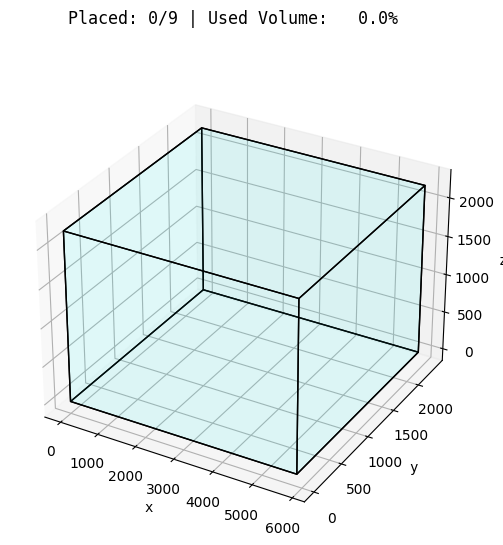

In [3]:
# Create the environment
# env_name = "BinPack-v2"
# env = jumanji.make(env_name)
env = BinPack(
    generator=RandomGenerator(
        max_num_items=10,
        max_num_ems=15,
        split_num_same_items=2,
        ),
    obs_num_ems=15,
)

# Reset the environment
key = jax.random.PRNGKey(BIN_PACK_SEED)
initial_state, initial_timestep = env.reset(key)

# Render the initial state
env.render(initial_state)

### States and Observations - $s_t$ and $o_t$

In RL, an agent perceives an observation of the environment's state. In some settings, the observation may include all the information underlying the environment's state. Such an environment is called **fully observed**. In other settings, the agent may only receive partial information about the environment's state in its observation. Such an environment is called **partially observed**. 

For the rest of this tutorial, we will assume the environment is fully observed and so the observation contains all the information in state $s_t$, so can use them interchangeably. 

In Jumanji we get the initial state, and the initial observation from the environment by calling the function `env.reset(key)`.

This returns two items: 

- state: everything the environment requires to evolve the state
 
- timestep.observation: what the agent observes from the state

In [4]:
# Reset the environment
key = jax.random.PRNGKey(BIN_PACK_SEED)
initial_state, initial_timestep = env.reset(key)

observation_shapes = jax.tree_util.tree_map(lambda x: x.shape, initial_timestep.observation)
print("Initial observation", observation_shapes)

# # Get environment obs space
# print("\nObservation specifications:", env.observation_spec())

Initial observation Observation(ems=Space(
	x1=(15,), x2=(15,),
	y1=(15,), y2=(15,),
	z1=(15,), z2=(15,),
), ems_mask=(15,), items=Item(x_len=(10,), y_len=(10,), z_len=(10,)), items_mask=(10,), items_placed=(10,), action_mask=(15, 10))


Specifically in the BinPack Problem, the environment provides the agent information on: 

1. the **available empty space** (called EMSs) in the current state, via an EMS mask.

2. the **items** that still need to be packed, along with a list of **items placed** already

3. information on what **actions are valid** in this state


### Actions - $a_t$

In RL, actions are usually either **discrete** or **continuous**. Continuous actions are given by a vector of real numbers. Discrete actions are given by an integer value. 

In BinPack we have a multi-dimensional set of discrete actions that  
represent the ID of an EMS (the **space**) and the ID of an **item**. For instance, [1, 5] will place item 5 in EMS.

In [5]:
print(f"Action specifications:", env.action_spec())

Action specifications: MultiDiscreteArray(shape=(2,), dtype=dtype('int32'), name='action', minimum=DeviceArray([0, 0], dtype=int32), maximum=DeviceArray([14,  9], dtype=int32), num_values=DeviceArray([15, 10], dtype=int32))


### Mathematically 

we formally define the problem as a Markov decision process:  $\mathcal{M} = (S, A, \mu, P, R)$, 

where the components correspond to: 

- $S$ is the space of all possible states, 

- $A$ is the space of all possible actions available to the agent, 

- $\mu$ is a distribution of initial states, 

- $P$ is the unknown environment transition dynamics, 

- $R$ is the reward function, 

<br/>

We can generate trajectories from an MDP by **rolling out** the environment dynamics. 

That is, at time step $t$, an action $a_t$ transitions the environment from the current state $s_t$ to the next state $s_{t+1}$ as defined by the environment dynamics $P$, resulting in a reward $r_{t}$. 

<br/>

The **objective of an agent** is often to maximize the (discounted) *expected return*, which is given by $\mathbb{E}_{a_t \sim \pi(\cdot|s_t)} [\sum_{t=0}^T \gamma^t  r(s_t, a_t)]$, where $\gamma \in (0,1)$ is the discount factor (that applies more emphasis to earlier rewards than later rewarsd) and $\pi$ is the agent's policy. 


### The Agent's Policy - $\pi$

In RL the agent chooses actions based on the observations it receives. We can think of the agent's action selection process as a function that takes an observation as input and returns an action as output. In RL we usually call this function the agent's **policy** and denote it $\pi(s_t)=a_t$. In RL we usually parametrise our policy in some way and then try to learn the optimal parameters. A parametrised policy is usually denoted $\pi_\theta$, where $\theta$ is the set of parameters.


### The Environment Transition Function - $P$

Now that we have a policy we can pass actions from the agent to the environment. The environment will then transition to a new state in response to the agent's action. 

In RL we model this process by using a **state transition function** $P$ which takes the current state $s_t$ and an action $a_t$ as input and returns the next state $s_{t+1}$ as output:

<center>
 $s_{t+1}=P(s_t, a_t)$
</center> 

In Jumanji, we can pass actions to the environment by calling the `env.step(<action>)` function. The function will then return four values:
- the **next observation**
- the **reward** for the action taken
- a boolean flag to indicate if the game is **done** 
- some **extra** information.




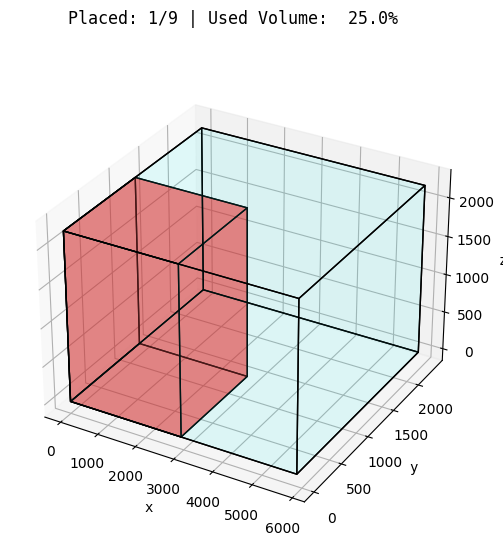

In [6]:
# Get the initial obs by resetting the env
key = jax.random.PRNGKey(BIN_PACK_SEED)
initial_state, initial_timestep = env.reset(key)

# Randomly sample an action from the env's action spec
action = env.action_spec().generate_value()

next_state, timestep = env.step(initial_state, action)

# Render the initial state
env.render(next_state)

### Episode Return - $R_t$

In RL we usually break an agent's interactions with the environment up into **episodes**.The sum of all rewards collected during an episode is what we call the episode's **return** - $R_t$:

<center>
$R_t=\sum_{t=0}^Tr_t$,
</center>

where $r_t$ is the reward at time $t$ and $T$ is the last timestep. The goal in RL is for the agent to chose actions which maximise this expected future return $R_t$.  


### Agent-environment Loop
Now that we know what a policy is and we know how to step the environment, let's close the agent-environment loop.

Here we have a function that runs one episode of BinPack by sequentially choosing actions and stepping the environment. It uses a linear function for the policy to chose actions and the function keeps track of the reward received and outputs the return at the end of the episode.

In BinPack the agent receives a reward of the normalized volume (relative to the container volume) of the item packed by taking the chosen action. The computed reward is equivalent to the increase in volume utilization of the container due to packing the chosen item.


In [7]:
#@title Rollout an episode (run me) { display-mode: "form" }

from jumanji.training import networks

random_policy = networks.make_random_policy_bin_pack(env.unwrapped)

@jax.jit
def select_action(observation, key):
    batched_observation = jax.tree_util.tree_map(lambda x: x[None], observation)
    return random_policy(batched_observation, key).squeeze(axis=0)

episode_return = 0
key = jax.random.PRNGKey(BIN_PACK_SEED)
state, timestep = jax.jit(env.reset)(key)
states = [state]
episode_key = jax.random.PRNGKey(1)

# Loop until the episode is done.
while not timestep.last():
    # Select an action.
    action_key, episode_key = jax.random.split(episode_key)
    action = select_action(timestep.observation, action_key)
    # Step in the environment.
    state, timestep = jax.jit(env.step)(state, action)
    episode_return += timestep.reward
    states.append(state)

states = states + 3*[states[-1]]
env.animate(states)

In [8]:
#@title Rollout another episode (run me) { display-mode: "form" }

from jumanji.training import networks

random_policy = networks.make_random_policy_bin_pack(env.unwrapped)

@jax.jit
def select_action(observation, key):
    batched_observation = jax.tree_util.tree_map(lambda x: x[None], observation)
    return random_policy(batched_observation, key).squeeze(axis=0)

episode_return = 0
key = jax.random.PRNGKey(BIN_PACK_SEED)
state, timestep = jax.jit(env.reset)(key)
states = [state]
episode_key = jax.random.PRNGKey(2)

# Loop until the episode is done.
while not timestep.last():
    # Select an action.
    action_key, episode_key = jax.random.split(episode_key)
    action = select_action(timestep.observation, action_key)
    # Step in the environment.
    state, timestep = jax.jit(env.step)(state, action)
    episode_return += timestep.reward
    states.append(state)

states = states + 3*[states[-1]]
env.animate(states)

In [9]:
#@title Rollout one last episode (run me) { display-mode: "form" }

from jumanji.training import networks

random_policy = networks.make_random_policy_bin_pack(env.unwrapped)

@jax.jit
def select_action(observation, key):
    batched_observation = jax.tree_util.tree_map(lambda x: x[None], observation)
    return random_policy(batched_observation, key).squeeze(axis=0)

episode_return = 0
key = jax.random.PRNGKey(BIN_PACK_SEED)
state, timestep = jax.jit(env.reset)(key)
states = [state]
episode_key = jax.random.PRNGKey(2)

# Loop until the episode is done.
while not timestep.last():
    # Select an action.
    action_key, episode_key = jax.random.split(episode_key)
    action = select_action(timestep.observation, action_key)
    # Step in the environment.
    state, timestep = jax.jit(env.step)(state, action)
    episode_return += timestep.reward
    states.append(state)

states = states + 3*[states[-1]]
env.animate(states)

In BinPack, the environment is considered solved when the agent can reliably pack all the items into the space. As you can see, our random policy is far from optimal.

One way we can find an optimal policy is by randomly trying out different policies until we find one that is optimal. This strategy is called Random Policy Search and can be supprisingly effective.

Before we implement Random Policy Search, let's quickly cover the general RL training loop we will be using  to implement the algorithms in the rest of this turorial.

### A General Purpose RL Training Loop
We have implemented a general purpose RL training loop for you. The training loop takes several arguments as input but the three most important for you to understand are `agent_select_action_func`, `agent_learn_func` and the `agent_memory`. 

* The `agent_select_action_func` is a function we define and can pass to the training loop. The function takes an observation and set of `agent_params` as input and should return an action.
* The `agent_learn_func` is another method we define and pass to the training loop. It should take the agent's parameters and some "memories" as input and then update and return the agents new parameters.
* The `agent_memory` is a general purpose module we define that can store some relevant information about the agent's experiences in the environment that can be used in the `agent_learn_func`.


Below is the training loop function we have implemented for you. You are welcome to go through the code and try to understand it but this is not required. As such, we have hidden the code by default, just make sure that you run the code cell before moving on because the training loop is used throughout this prac.

In [10]:
#@title Download Jumanji Configs (run me) { display-mode: "form" }

import os
import requests

def download_file(url: str, file_path: str) -> None:
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
    else:
        print("Failed to download the file.")

os.makedirs("configs", exist_ok=True)
config_url = "https://raw.githubusercontent.com/instadeepai/jumanji/main/jumanji/training/configs/config.yaml"
download_file(config_url, "configs/config.yaml")
bin_pack_url = "https://raw.githubusercontent.com/instadeepai/jumanji/main/jumanji/training/configs/env/bin_pack.yaml"
os.makedirs("configs/env", exist_ok=True)
download_file(bin_pack_url, "configs/env/bin_pack.yaml")

In [11]:
#@title Setup training (run me) { display-mode: "form" }

# This code is copied from jumanji https://github.com/instadeepai/jumanji

from typing import Tuple

import chex
import jax
import jax.numpy as jnp
import optax
from omegaconf import DictConfig

import jumanji
from jumanji.env import Environment
from jumanji.environments import BinPack
from jumanji.environments.packing.bin_pack.generator import RandomGenerator
from jumanji.training import networks
from jumanji.training.agents.a2c import A2CAgent
from jumanji.training.agents.base import Agent
from jumanji.training.agents.random import RandomAgent
from jumanji.training.evaluator import Evaluator
from jumanji.training.loggers import (
    Logger,
    NoOpLogger,
    TensorboardLogger,
    TerminalLogger,
)
from jumanji.training.networks.actor_critic import ActorCriticNetworks
from jumanji.training.networks.protocols import RandomPolicy
from jumanji.training.types import ActingState, TrainingState
from jumanji.wrappers import VmapAutoResetWrapper


def setup_logger(cfg: DictConfig) -> Logger:
    logger: Logger
    # Log only once if there are multiple hosts on the pod.
    if jax.process_index() != 0:
        return NoOpLogger()
    if cfg.logger.type == "tensorboard":
        logger = TensorboardLogger(
            name=cfg.logger.name, save_checkpoint=cfg.logger.save_checkpoint
        )
    elif cfg.logger.type == "terminal":
        logger = TerminalLogger(
            name=cfg.logger.name, save_checkpoint=cfg.logger.save_checkpoint
        )
    else:
        raise ValueError(
            f"logger expected in ['tensorboard', 'terminal'], got {cfg.logger}."
        )
    return logger


def _make_raw_env(cfg: DictConfig) -> Environment:
    # env = jumanji.make(cfg.env.registered_version)
    env = BinPack(
        generator=RandomGenerator(
            max_num_items=10,
            max_num_ems=15,
            split_num_same_items=2,
            ),
        obs_num_ems=15,
    )
    return env


def setup_env(cfg: DictConfig) -> Environment:
    env = _make_raw_env(cfg)
    env = VmapAutoResetWrapper(env)
    return env


def setup_agent(cfg: DictConfig, env: Environment) -> Agent:
    agent: Agent
    if cfg.agent == "random":
        random_policy = _setup_random_policy(cfg, env)
        agent = RandomAgent(
            env=env,
            n_steps=cfg.env.training.n_steps,
            total_batch_size=cfg.env.training.total_batch_size,
            random_policy=random_policy,
        )
    elif cfg.agent == "a2c":
        actor_critic_networks = _setup_actor_critic_neworks(cfg, env)
        optimizer = optax.adam(cfg.env.a2c.learning_rate)
        agent = A2CAgent(
            env=env,
            n_steps=cfg.env.training.n_steps,
            total_batch_size=cfg.env.training.total_batch_size,
            actor_critic_networks=actor_critic_networks,
            optimizer=optimizer,
            normalize_advantage=cfg.env.a2c.normalize_advantage,
            discount_factor=cfg.env.a2c.discount_factor,
            bootstrapping_factor=cfg.env.a2c.bootstrapping_factor,
            l_pg=cfg.env.a2c.l_pg,
            l_td=cfg.env.a2c.l_td,
            l_en=cfg.env.a2c.l_en,
        )
    else:
        raise ValueError(
            f"Expected agent name to be in ['random', 'a2c'], got {cfg.agent}."
        )
    return agent


def _setup_random_policy(
    cfg: DictConfig, env: Environment
) -> RandomPolicy:
    assert cfg.agent == "random"
    if cfg.env.name == "bin_pack":
        assert isinstance(env.unwrapped, BinPack)
        random_policy = networks.make_random_policy_bin_pack(bin_pack=env.unwrapped)
    else:
        raise ValueError(f"Environment name not found. Got {cfg.env.name}.")
    return random_policy


def _setup_actor_critic_neworks(
    cfg: DictConfig, env: Environment
) -> ActorCriticNetworks:
    assert cfg.agent == "a2c"
    if cfg.env.name == "bin_pack":
        assert isinstance(env.unwrapped, BinPack)
        actor_critic_networks = networks.make_actor_critic_networks_bin_pack(
            bin_pack=env.unwrapped,
            num_transformer_layers=cfg.env.network.num_transformer_layers,
            transformer_num_heads=cfg.env.network.transformer_num_heads,
            transformer_key_size=cfg.env.network.transformer_key_size,
            transformer_mlp_units=cfg.env.network.transformer_mlp_units,
        )
    else:
        raise ValueError(f"Environment name not found. Got {cfg.env.name}.")
    return actor_critic_networks


def setup_evaluator(cfg: DictConfig, agent: Agent) -> Evaluator:
    env = _make_raw_env(cfg)
    stochastic_eval = Evaluator(
        eval_env=env,
        agent=agent,
        total_batch_size=cfg.env.evaluation.eval_total_batch_size,
        stochastic=True,
    )
    return stochastic_eval


def setup_training_state(
    env: Environment, agent: Agent, key: chex.PRNGKey
) -> TrainingState:
    params_key, reset_key, acting_key = jax.random.split(key, 3)

    # Initialize params.
    params_state = agent.init_params(params_key)

    # Initialize environment states.
    num_local_devices = jax.local_device_count()
    num_global_devices = jax.device_count()
    num_workers = num_global_devices // num_local_devices
    local_batch_size = agent.total_batch_size // num_global_devices
    reset_keys = jax.random.split(reset_key, agent.total_batch_size).reshape(
        (
            num_workers,
            num_local_devices,
            local_batch_size,
            -1,
        )
    )
    reset_keys_per_worker = reset_keys[jax.process_index()]
    env_state, timestep = jax.pmap(env.reset, axis_name="devices")(
        reset_keys_per_worker
    )

    # Initialize acting states.
    acting_key_per_device = jax.random.split(acting_key, num_global_devices).reshape(
        num_workers, num_local_devices, -1
    )
    acting_key_per_worker_device = acting_key_per_device[jax.process_index()]
    acting_state = ActingState(
        state=env_state,
        timestep=timestep,
        key=acting_key_per_worker_device,
        episode_count=jnp.zeros(num_local_devices, float),
        env_step_count=jnp.zeros(num_local_devices, float),
    )

    # Build the training state.
    training_state = TrainingState(
        params_state=jax.device_put_replicated(params_state, jax.local_devices()),
        acting_state=acting_state,
    )
    return training_state


In [15]:
#@title Training (run me) { display-mode: "form" }
# @markdown This may take a while.

from jumanji.training.train import train
import hydra

with hydra.initialize(version_base=None, config_path="configs"):
    cfg = hydra.compose(
        config_name="config.yaml",
        overrides=[
            "env=bin_pack",
            "agent=a2c",
            "logger.type=terminal",
            "logger.save_checkpoint=true",
            "env.training.num_epochs=5",
            "env.training.num_learner_steps_per_epoch=5",
            "env.training.n_steps=20",
            "env.training.total_batch_size=64",
            "env.evaluation.eval_total_batch_size=1000",
            "env.evaluation.greedy_eval_total_batch_size=0",
        ],
    )

import functools
import logging
from typing import Dict, Tuple

import hydra
import jax
import jax.numpy as jnp
import omegaconf
from tqdm.auto import trange

from jumanji.training import utils
from jumanji.training.agents.random import RandomAgent
from jumanji.training.loggers import TerminalLogger
from jumanji.training.timer import Timer
from jumanji.training.types import TrainingState


logging.info(omegaconf.OmegaConf.to_yaml(cfg))
logging.getLogger().setLevel(logging.INFO)
logging.info({"devices": jax.local_devices()})

key, init_key = jax.random.split(jax.random.PRNGKey(cfg.seed))
logger = setup_logger(cfg)
env = setup_env(cfg)
agent = setup_agent(cfg, env)
evaluator = setup_evaluator(cfg, agent)
training_state = setup_training_state(env, agent, init_key)
num_steps_per_epoch = (
    cfg.env.training.n_steps
    * cfg.env.training.total_batch_size
    * cfg.env.training.num_learner_steps_per_epoch
)
timer = Timer(out_var_name="metrics")

@functools.partial(jax.pmap, axis_name="devices")
def epoch_fn(training_state: TrainingState) -> Tuple[TrainingState, Dict]:
    training_state, metrics = jax.lax.scan(
        lambda training_state, _: agent.run_epoch(training_state),
        training_state,
        None,
        cfg.env.training.num_learner_steps_per_epoch,
    )
    metrics = jax.tree_util.tree_map(jnp.mean, metrics)
    return training_state, metrics

with logger:
    for i in trange(
        cfg.env.training.num_epochs,
        disable=isinstance(logger, TerminalLogger),
    ):
        env_steps = i * num_steps_per_epoch

        key, eval_key, = jax.random.split(key)
        # Evaluation
        with timer:
            metrics = evaluator.run_evaluation(
                training_state.params_state, eval_key
            )
            jax.block_until_ready(metrics)
        logger.write(
            data=utils.first_from_device(metrics),
            label="eval",
            env_steps=env_steps,
        )

        # Training
        with timer:
            training_state, metrics = epoch_fn(training_state)
            jax.block_until_ready((training_state, metrics))
        logger.write(
            data=utils.first_from_device(metrics),
            label="train",
            env_steps=env_steps,
        )


INFO:root:agent: a2c
seed: 0
logger:
  type: terminal
  save_checkpoint: true
  name: ${agent}_${env.name}
env:
  name: bin_pack
  registered_version: BinPack-v2
  network:
    num_transformer_layers: 2
    transformer_num_heads: 8
    transformer_key_size: 16
    transformer_mlp_units:
    - 512
  training:
    num_epochs: 5
    num_learner_steps_per_epoch: 5
    n_steps: 20
    total_batch_size: 64
  evaluation:
    eval_total_batch_size: 1000
    greedy_eval_total_batch_size: 0
  a2c:
    normalize_advantage: false
    discount_factor: 1.0
    bootstrapping_factor: 0.95
    l_pg: 1.0
    l_td: 1.0
    l_en: 0.005
    learning_rate: 0.0001

INFO:root:{'devices': [CpuDevice(id=0)]}
INFO:root:Experiment: a2c_bin_pack.
INFO:root:Starting logger.
INFO:root:Eval >> Env Steps: 0.00e+00 | Active Ems: 6.861 | Episode Length: 7.181 | Episode Return: 0.703 | Invalid Action: 0.000 | Packed Items: 7.181 | Ratio Packed Items: 0.798 | Time: 59.867 | Volume Utilization: 0.703
INFO:root:Train >> Env

In [20]:
#@title Rollout an episode after training (run me) { display-mode: "form" }

from jumanji.training import networks

policy_params = utils.first_from_device(training_state.params_state.params.actor)
policy = agent.make_policy(
    policy_params=policy_params, stochastic=True
)

@jax.jit
def select_action(observation, key):
    batched_observation = jax.tree_util.tree_map(lambda x: x[None], observation)
    action, _ = policy(batched_observation, key)
    return action.squeeze(axis=0)

episode_return = 0
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.unwrapped.reset)(key)
states = [state]

# Loop until the episode is done.
while not timestep.last():
    # Select an action.
    action_key, key = jax.random.split(key)
    action = select_action(timestep.observation, action_key)
    # Step in the environment.
    state, timestep = jax.jit(env.unwrapped.step)(state, action)
    episode_return += timestep.reward
    states.append(state)

states = states + 3*[states[-1]]
env.animate(states)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## Section 3: Policy Gradients (PG)
As discussed, the goal in RL is to find a policy which maximise the expected cummulative reward (return) the agent receives from the environment. We can write the expected return of a policy as:

$J(\pi_\theta)=\mathrm{E}_{\tau\sim\pi_\theta}\ [R(\tau)]$,

where $\pi_\theta$ is a policy parametrised by $\theta$, $\mathrm{E}$ means *expectation*, $\tau$ is shorthand for "*episode*", $\tau\sim\pi_\theta$ is shorthand for "*episodes sampled using the policy* $\pi_\theta$", and $R(\tau)$ is the return of episode $\tau$.

Then, the goal in RL is to find the parameters $\theta$ that maximise the function $J(\pi_\theta)$. One way to find these parameters is to perform gradient ascent on $J(\pi_\theta)$ with respect to the parameters $\theta$: 

$\theta_{k+1}=\theta_k + \alpha \nabla J(\pi_\theta)|_{\theta_{k}}$,

where $\nabla J(\pi_\theta)|_{\theta_{k}}$ is the gradient of the expected return with respect to the policy parameters $\theta_k$ and $\alpha$ is the step size. This quantity, $\nabla J(\pi_\theta)$, is also called the **policy gradient** and is very important in RL. If we can comput the policy gradient, then we will have a means by which to directly optimise our policy.

As it turns out, there is a way for us to compute the policy gradient and the mathematical derivation can be found [here](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html). But for this tutorial we will ommit the derivation and just give you the result:


$\nabla_{\theta} J(\pi_{\theta})=\underset{\tau \sim \pi_{\theta}}{\mathrm{E}}[\sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta}(a_{t} \mid s_{t}) R(\tau)]$

Informaly, the policy gradient is equal to the gradient of the log of the probability of the action chosen, multiplied by the return of the episode in which the action was taken.


### REINFORCE
REINFORCE is a simple RL algorithm that uses the policy gradient to find the optimal policy by increasing the probability of choosing actions (reinforcing actions) that tend to lead to high return episodes.

**Exercise 6:** Implement a function that takes the probability of an action and the return of the episode the action was taken in and computes the log of the probability, multiplied by the return. Make sure you use JAX.

**Useful functions:**
*   `jax.numpy.log`([docs](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.log.html))

In [ ]:
def compute_weighted_log_prob(action_prob, episode_return):

    # YOUR CODE

    log_porb = ...

    weighted_log_prob = ... 

    # END YOUR CODE

    return weighted_log_prob

In [ ]:
#@title Check exercise 6 {display-mode: "form"}

try:
  action_prob = 0.8
  episode_return = 100
  result = compute_weighted_log_prob(action_prob, episode_return)
  if result != -22.314354:
    print("Your implementation looks incorrect.")
  else:
    print("Looks correct.")
except Exception as e:
    print("An Error Occured: {}".format(e))

In [ ]:
#@title Solution exercise 6 {display-mode: "form"}

def compute_weighted_log_prob(action_prob, episode_return):

    # YOUR CODE

    log_prob = jax.numpy.log(action_prob)

    weighted_log_prob = log_prob * episode_return

    # END YOUR CODE

    return weighted_log_prob


### Rewards-to-go
Performing gradient ascent on the gradient of the log of the action probability, weighted by the return of the episode will tend to push up the probability of actions that were in episodes with high return, regardless of *where* in the episode the action was taken. This does not really make much sense because an action near the end of an episode may be reinforced because lots of reward was collected earlier on in the episode, *before* the action was taken. RL agents should really only reinforce actions on the basis of their *consequences*. Rewards obtained before taking an action have no bearing on how good that action was: only rewards that come after. The cummulative rewards received after an action was taken is called the **rewards-to-go** and can be computed as:

$\hat{R}_i=\sum_{t=i}^Tr_t$

Compare this to the episode return:

$R(\tau)=\sum_{t=0}^Tr_t$

We can improve the reliability of the policy gradient by substituting the episode return with the rewards-to-go. The policy gradient with rewards-to-go is given by:

$\nabla_{\theta} J(\pi_{\theta})=\underset{\tau \sim \pi_{\theta}}{\mathrm{E}}[\sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta}(a_{t} \mid s_{t}) \hat{R}_t]$

**Exercise 7:** Implement a function that takes a list of all the rewards obtained in an episode and computes the rewards-to-go. Don't worry about using JAX in this function. You can use regular Python operations like `for-loops`.

In [ ]:
def compute_rewards_to_go(rewards):
    """
    This function should take a list of rewards as input and 
    compute the rewards-to-go for each timestep.

    EXAMPLE: compute_rewards_to_go([1,2,3,4]) = [10, 9, 7, 4]
    
    Arguments:
        rewards[t] is the reward at time step t.

    Returns:
        rewards_to_go[t] should be the reward-to-go at timestep t.
    """

    rewards_to_go = []

    # YOUR CODE


    # END YOUR CODE

    return rewards_to_go

In [ ]:
#@title Check exercise 7 {display-mode: "form"}

try: 
  result = compute_rewards_to_go([1,2,3,4])

  if result != [10, 9, 7, 4]:
    print("There is a problem with your implementation.")
  else:
    print("Looks correct.")
except Exception as e:
    print("An Error Occured: {}".format(e))


In [ ]:
#@title Solution exercise 7 {display-mode: "form"}

def compute_rewards_to_go(rewards):
    rewards_to_go = []
    for i in range(len(rewards)):
        r2g = 0
        for j in range(i, len(rewards)):
            r2g += rewards[j]
        rewards_to_go.append(r2g)
    return rewards_to_go

### REINFORCE memory
Next we will need to make a new agent memory to store the rewards-to-go $\hat{R}_t$ along with the observation $o_t$ and action $a_t$ at every timestep. Below we implemented such a memory module for you. The function `memory.sample()` will return a batch of last 500 memories. You are welcome to read through the code to try and understand it, but it is not required. Therefore, we hide the code by default.

In [ ]:
# @title Memory implementation (run me) {display-mode: "form"}

# NamedTuple to store memory
EpisodeRewardsToGoMemory = collections.namedtuple("EpisodeRewardsToGoMemory", ["obs", "action", "reward_to_go"])

class EpisodeRewardsToGoBuffer:

    def __init__(self, num_transitions_to_store=512, batch_size=256):
        self.batch_size = batch_size
        self.memory_buffer = collections.deque(maxlen=num_transitions_to_store)
        self.current_episode_transition_buffer = []

    def push(self, transition):
        self.current_episode_transition_buffer.append(transition)

        if transition.done:

            episode_rewards = []
            for t in self.current_episode_transition_buffer:
                episode_rewards.append(t.reward)

            r2g = compute_rewards_to_go(episode_rewards)

            for i, t in enumerate(self.current_episode_transition_buffer):
                memory = EpisodeRewardsToGoMemory(t.obs, t.action, r2g[i])
                self.memory_buffer.append(memory)

            # Reset episode buffer
            self.current_episode_transition_buffer = []


    def is_ready(self):
        return len(self.memory_buffer) >= self.batch_size

    def sample(self):
        random_memory_sample = random.sample(self.memory_buffer, self.batch_size)

        obs_batch, action_batch, reward_to_go_batch = zip(*random_memory_sample)

        return EpisodeRewardsToGoMemory(
            np.stack(obs_batch).astype("float32"), 
            np.asarray(action_batch).astype("int32"), 
            np.asarray(reward_to_go_batch).astype("int32")
        )


# Instantiate Memory
REINFORCE_memory = EpisodeRewardsToGoBuffer(num_transitions_to_store=512, batch_size=256)

### Policy neural network
Next, we will use a simple neural network to aproximate the policy. Our policy neural network will have an input layer that takes the observation as input and passes it through two hidden layers and then outputs one scalar value for each of the possible actions. So, in CartPole the output layer will have size `2`.

[Haiku](https://github.com/deepmind/dm-haiku) is a library for implementing neural networks is JAX. Below we have implemented a simple function to make the policy network for you. 


In [ ]:
def make_policy_network(num_actions: int, layers=[20, 20]) -> hk.Transformed:
  """Factory for a simple MLP network for the policy."""

  def policy_network(obs):
    network = hk.Sequential(
        [
            hk.Flatten(),
            hk.nets.MLP(layers + [num_actions])
        ]
    )
    return network(obs)

  return hk.without_apply_rng(hk.transform(policy_network))

Haiku networks have two important functions you need to know about. The first is the `network.init(<random_key>, <input>)`, which returns a set of random initial parameters. The second method is the `network.apply(<params>, <input>)` which passes an input through the network using the set of parameters provided.

In [ ]:
# Example
POLICY_NETWORK = make_policy_network(num_actions=num_actions, layers=[20,20])
random_key = jax.random.PRNGKey(42) # random key
dummy_obs = np.ones(obs_shape, "float32")

# Initialise parameters
REINFORCE_params = POLICY_NETWORK.init(random_key, dummy_obs)
print("Initial params:", REINFORCE_params.keys())

# Pass input through the network
output = POLICY_NETWORK.apply(REINFORCE_params, dummy_obs)
print("Policy network output:", output)


The outputs of our policy network are [logits](https://qr.ae/pv4YTe). To convert this into a probability distribution over actions we pass the logits to the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function.

### REINFORCE choose action function

**Exercise 8:** Complete the function below which takes a vector of logits and randomly samples an action from a categorical distibution given by the logits. 

**Useful functions:**
*   `jax.random.categorical` ([docs](https://jax.readthedocs.io/en/latest/_autosummary/jax.random.categorical.html))

In [ ]:
def sample_action(random_key, logits):
    
  # YOUR CODE HERE
  action = ...

  # END YOUR code

  return action

In [ ]:
#@title Check exercise 8 {display-mode: "form"}

try:
  random_key = jax.random.PRNGKey(42) # random key
  action = sample_action(random_key, np.array([1,2], "float32"))
  if action != 1:
    print("Your function is incorrect.")
  else:
    print("Seems correct.")
except Exception as e:
    print("An Error Occured: {}".format(e))

In [ ]:
#@title Solution exercise 8 {display-mode: "form"}

def sample_action(random_key, logits):
    
    # YOUR CODE HERE

    action = jax.random.categorical(random_key, logits)

    # END YOUR code

    return action


Now we can implement the `REINFORCE_choose_action` function. We will pass the observation through the policy network to compute the logits and then pass the logits to the `sample_action` function to choose and action.

In [ ]:
def REINFORCE_choose_action(key, params, actor_state, obs, evaluation=False):
  obs = jnp.expand_dims(obs, axis=0) # add dummy batch dim before passing through network

  # Pass obs through policy network to compute logits
  logits = POLICY_NETWORK.apply(params, obs)
  logits = logits[0] # remove batch dim

  # Randomly sample action
  sampled_action = sample_action(key, logits)
  
  return sampled_action, actor_state

Now that we have  implemented the `REINFORCE_choose_action` function, all we have left to do is to make a `REINFORCE_learn` function. The learn function should use the `weighted_log_prob` function we made earlier to compute the policy gradient loss and apply the gradient updates to our neural network.

### Policy gradient loss

**Exercise 9:** Complete the `policy_gradient_loss` function below. The function should compute the action probabilities by passing the `logits` through the softmax function. Then you should extract the probability of the given `action` (using array indexing) and compute the `weighted_log_prob` using the function we made earlier.

**Useful methods:**
*   `jax.nn.softmax` ([docs](https://jax.readthedocs.io/en/latest/_autosummary/jax.nn.softmax.html))

In [ ]:
def policy_gradient_loss(action, logits, reward_to_go):

  # YOUR CODE

  all_action_probs = ... # convert logits into probs

  action_prob = ... # using array indexing to get prob of action

  weighted_log_prob = ...

  # END YOUR CODE
  
  loss = - weighted_log_prob # negative because we want gradient `ascent`
  
  return loss

In [ ]:
#@title Check exercise 9 {display-mode: "form"}

try:
  result = policy_gradient_loss(1, np.array([1,2], "float32"), 10)
  if result != 3.1326165:
    print("Your implementation looks wrong.")
  else:
    print("Looks correct.")
except Exception as e:
  print("An Error Occured: {}".format(e))


In [ ]:
#@title Solution exercise 9 {display-mode: "form"}

def policy_gradient_loss(action, logits, reward_to_go):

  # YOUR CODE

  all_action_probs = jax.nn.softmax(logits) # convert logits into probs

  action_prob = all_action_probs[action]

  weighted_log_prob = compute_weighted_log_prob(action_prob, reward_to_go)

  # END YOUR CODE
  
  loss = - weighted_log_prob # negative because we want gradient `ascent`
  
  return loss

When we do a policy gradient update step we are going to want to do it using a batch of experience, rather than just a single experience like above. We can use JAX's [vmap](https://jax.readthedocs.io/en/latest/_autosummary/jax.vmap.html#jax.vmap) function to easily make our `policy_gradient_loss` function work on a batch of experience.

In [ ]:
def batched_policy_gradient_loss(params, obs_batch, action_batch, reward_to_go_batch):
    # Get logits by passing observation through network
    logits_batch = POLICY_NETWORK.apply(params, obs_batch)

    policy_gradient_loss_batch = jax.vmap(policy_gradient_loss)(action_batch, logits_batch, reward_to_go_batch) # add batch

    # Compute mean loss over batch
    mean_policy_gradient_loss = jnp.mean(policy_gradient_loss_batch)

    return mean_policy_gradient_loss

# TEST
obs_batch = np.ones((3, *obs_shape), "float32")
actions_batch = np.array([1,0,0])
rew2go_batch = np.array([2.3, 4.3, 2.1])

loss = batched_policy_gradient_loss(REINFORCE_params, obs_batch, actions_batch, rew2go_batch)

print("Policy gradient loss on batch:", loss)

### Network Optimiser

To apply policy gradient updates to our neural network we will use a JAX library called [Optax](https://github.com/deepmind/optax). Optax has an implementation of the [Adam optimizer](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/) which we can use.

In [ ]:
REINFORCE_OPTIMIZER = optax.adam(1e-3)

# Initialise the optimiser
REINFORCE_optim_state = REINFORCE_OPTIMIZER.init(REINFORCE_params)

Now we have everything we need tp make the `REINFORCE_learn` function. We will store the state of the optimiser in the `learn_state`. We will compute the gradient of the policy gradient loss by using `jax.grad` ([docs](https://jax.readthedocs.io/en/latest/_autosummary/jax.grad.html)).

In [ ]:
# A NamedTuple to store the state of the optimiser
REINFORCELearnState = collections.namedtuple("LearnerState", ["optim_state"])


def REINFORCE_learn(key, params, learner_state, memory):
    
  # Get the policy gradient by using `jax.grad()` on `batched_policy_gradient_loss`
  grad_loss = jax.grad(batched_policy_gradient_loss)(params, memory.obs, memory.action, memory.reward_to_go)

  # Get param updates using gradient and optimizer
  updates, new_optim_state = REINFORCE_OPTIMIZER.update(grad_loss, learner_state.optim_state)

  # Apply updates to params
  params = optax.apply_updates(params, updates)

  return params, REINFORCELearnState(new_optim_state) # update learner state

### REINFORCE training loop
Now we can train our REINFORCE agent by putting everything together using the training loop. 

In [ ]:
# JIT the choose_action and learn functions for more speed
REINFORCE_learn_jit = jax.jit(REINFORCE_learn)
REINFORCE_choose_action_jit = jax.jit(REINFORCE_choose_action)

# Initial learn state
REINFORCE_learn_state = REINFORCELearnState(REINFORCE_optim_state)

# Run training loop
print("Starting training. This may take up to 10 minutes to complete.")
episode_returns, evaluator_returns = run_training_loop(
                                        env_name,
                                        REINFORCE_params,
                                        REINFORCE_choose_action_jit, 
                                        None, # action state not used
                                        REINFORCE_learn_jit, 
                                        REINFORCE_learn_state, 
                                        REINFORCE_memory,
                                        num_episodes=10_001,
                                        learn_steps_per_episode=2,
                                        video_subdir="reinforce"
                                      )

# Plot the episode returns
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Episode Return")
plt.title("REINFORCE")
plt.show()


In [ ]:
#@title Visualise Policy {display-mode: "form"}
#@markdown Choose an episode number that is a multiple of 100 and less than or equal to 1000, and **run this cell**.

episode_number = 100 #@param {type:"number"}

assert (episode_number % 100) == 0, "Episode number must be a multiple of 100 since we only record every 100th episode."
assert episode_number < 1001, "Episode number must be less than or equal to 1000"

eval_episode_number = int(episode_number / 100 * 8)
video_path = f"./video/reinforce/eval/rl-video-episode-{eval_episode_number}.mp4"

mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Conclusion
**Summary:**

In this practical we learnt the basics of reinforcement learning (RL).

In the first section we learnt some basic concepts such as environment observations, action selection strategies, rewards, and episodes. We learnt about rewards and that the goal in RL is to learn a policy which maximises some notion of cummulative reward that the agent receives from the environment (return). 

In the second section we searched for an optimal policy in CartPole using an algorithm called RandomSearch. Basically, we tried out different policies until we happened to find one that worked well. This method did not yield consistent results and success required immense luck.

In the third section we learnt about policy gradients and how we can use gradient ascent to adjust the parameters in our agents policy in the direction which maximises the expected cummulative reward (return).

Finally, in the fourth section we learnt about the state-action value function and how it is related to an optimal policy. We implemented an algorithm called Q-learning to learn the optimal state-action value function in CartPole. We learnt about the importance of using a target network and epsilon-greedy exploration.

**Next Steps:** 

Now that you have successfully solved CartPole with two different RL algorithms, REINFORCE and Deep Q-Learning, we now encourage you to use what you have learnt to try and solve some more challenging environments. OpenAI Gym is a great place to find RL environments. [LunarLander](https://www.gymlibrary.ml/environments/box2d/lunar_lander/) is a great next step. You can go to the start of this notebook ande replace the environment with LunarLander by replacing `env = gym.make("CartPole-v1")` with env = `gym.make("LunarLander-v2")`. Note, you will need to increase the number of training episodes in order to learn a good policy in LunarLander because it is a significantly more challenging environment than CartPole.

<center>
<img src="https://miro.medium.com/max/1194/1*Dj2fkRjrMA0w9E-PuyETdg.gif" width="60%" />
</center>

In addition, there are many RL algorithms out there that make significant improvements to REINFORCE and Deep Q-Learning. See these resources:
* [REINFORCE with baseline](https://spinningup.openai.com/en/latest/spinningup/rl_intro3.html#baselines-in-policy-gradients)
* [Double Deep Q-Network](https://arxiv.org/pdf/1509.06461.pdf)
* [Proximal Policy Optimisation (PPO)](https://arxiv.org/pdf/1707.06347.pdf)

If you are looking for a more indepth online course for RL you can checkout these courses:
* [Reinforcement Learning Foundations on LinkedIn Learning](https://www.linkedin.com/learning/reinforcement-learning-foundations) (made by one of our very own tutors, Khaulat Abdulhakeem)
* [An introduction to Reinforcement Learning on FreeCodeCamp](https://www.freecodecamp.org/news/an-introduction-to-reinforcement-learning-4339519de419/)
* [Reinforcement Learning Specialization on Coursera](https://www.coursera.org/specializations/reinforcement-learning)

Finally, the most infuential textbook on RL is available for free online:
* [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html) by Richard S. Sutton and Andrew G. Barto

**Appendix:** 

N/a

**References:** 

* [OpenAI Spinning Up](https://spinningup.openai.com/en/latest/)
* [Deep Q-Network]()

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2022).